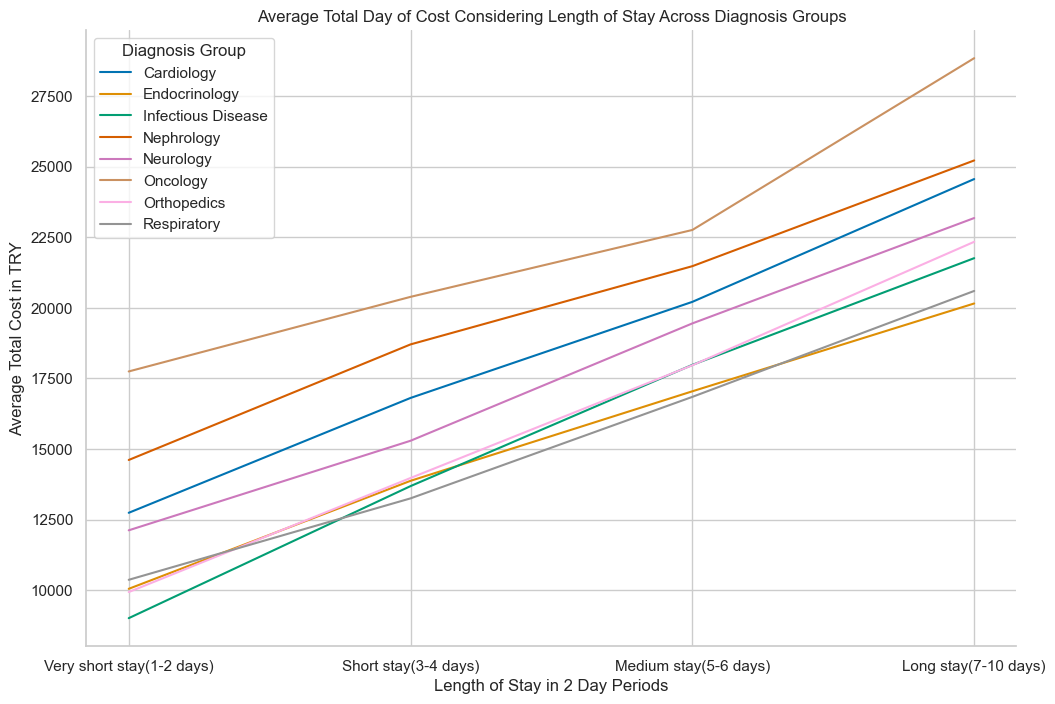

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv("synthetic_healthcare_1700_clean.csv")
df["Length of Stay Bins"]= pd.cut(df["Length of Stay (Days)"], bins = [0,2,4,6,10], 
labels= ["Very short stay(1-2 days)", "Short stay(3-4 days)", "Medium stay(5-6 days)", 
"Long stay(7-10 days)"])
# I used ChatGPT to understand that this dataset includes 10 days of stay at most, this is the reason
# why I used bins like this.
# Also, I checked pandas documentation to understand pd.cut()

aggregate_df = df.groupby(["Diagnosis Group", "Length of Stay Bins"], observed=False)["Total Cost (TRY)"].mean().reset_index()
# Used ChatGPT + documentation to understand groupby method

sns.set_theme(style = "whitegrid") 
plt.figure(figsize = (12, 8)) 

plt.title("Average Total Day of Cost Considering Length of Stay Across Diagnosis Groups")
plt.xlabel("Length of Stay in 2 Day Periods")
plt.ylabel("Average Total Cost in TRY")


sns.despine() # Used this to achieve a clean look.

sns.lineplot(data = aggregate_df, x = "Length of Stay Bins", y = "Total Cost (TRY)", 
             hue = "Diagnosis Group", palette = "colorblind")
# Used ChatGPT to consider a palette for my plot, it recommended me the "colorblind" palette.


plt.savefig("los_cost_analysis.png", dpi=300, bbox_inches = "tight")
#Asked ChatGPT how to save a visualization without taking the screenshot of the output of the code
# and this is what it recommend.

plt.show()
             
